In [16]:
import pandas as pd

# Construct the download URL
download_url = f"https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"

df_customers = pd.read_csv(download_url)
print("Display the first few rows of each dataset")
print(df_customers.head())

print("Check data info and missing values")
print(df_customers.nunique())

print(" Check for missing values")
print(df_customers.info())

print("Summary statistics for numerical columns")
print(df_customers.describe(include='all'))

Display the first few rows of each dataset
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Check data info and missing values
CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64
 Check for missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Summary statistics for numerical columns
 

In [17]:
download_url = f"https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"

df_products = pd.read_csv(download_url)


print("Display the first few rows of each dataset")
print(df_products.head())

print("Check data info and missing values")
print(df_products.nunique())

print(" Check for missing values")
print(df_products.info())

print("Summary statistics for numerical columns")
print(df_products.describe(include='all'))


Display the first few rows of each dataset
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Check data info and missing values
ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64
 Check for missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Summary statistics for numerical columns
      

In [18]:
download_url = f"https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

df_transactions = pd.read_csv(download_url)

print("Display the first few rows of each dataset")
print(df_transactions.head())

print("Check data info and missing values")
print(df_transactions.nunique())

print(" Check for missing values")
print(df_transactions.info())

print("Summary statistics for numerical columns")
print(df_transactions.describe(include='all'))

Display the first few rows of each dataset
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
Check data info and missing values
TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64
 Check for missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  D


# 1. performing customer analysis to identify top regions

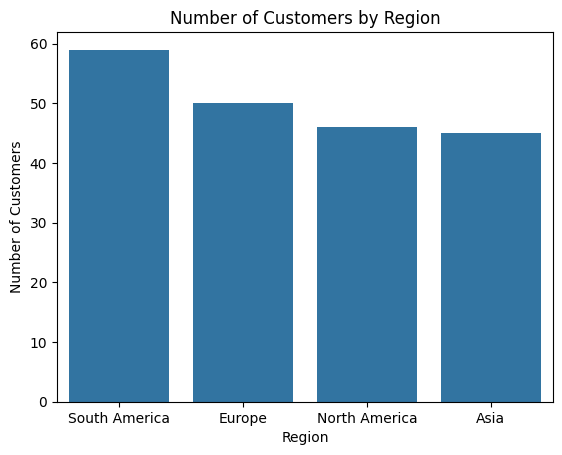

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

region_counts = df_customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


# 2. Signup Trends Over Time

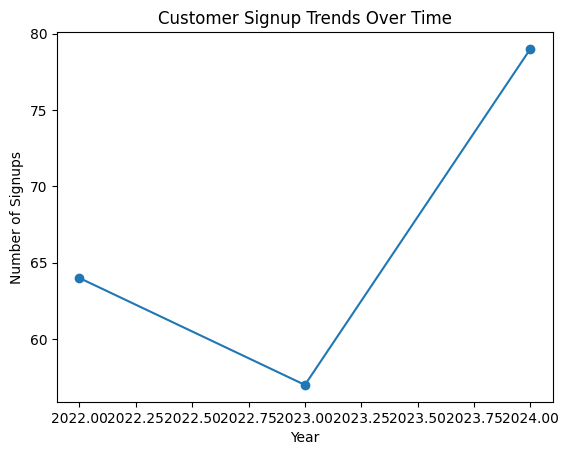

In [22]:
df_customers['SignupDate'] = pd.to_datetime(df_customers['SignupDate'])
signup_trends = df_customers.groupby(df_customers['SignupDate'].dt.year)['CustomerID'].count()
signup_trends.plot(kind='line', marker='o')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

# 3. Top Categories by Total Sales

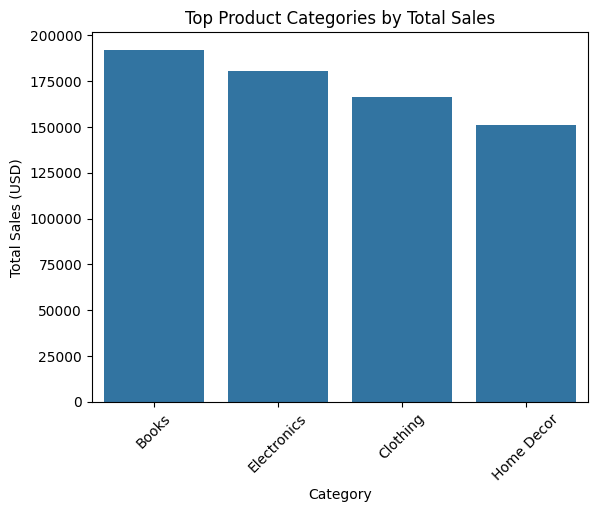

In [23]:
merged_df = df_transactions.merge(df_customers, on="CustomerID", how="left").merge(df_products, on="ProductID", how="left")

top_categories = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Product Categories by Total Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

# 4.Most Popular Products:

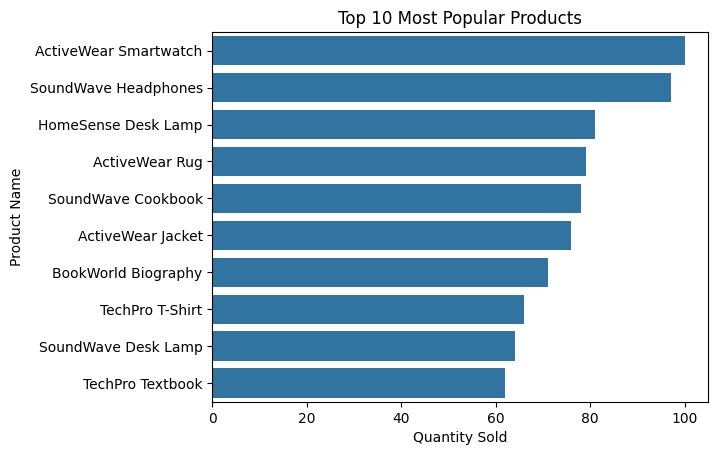

In [24]:
popular_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=popular_products.values, y=popular_products.index)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# 5. Monthly Transaction Trends:

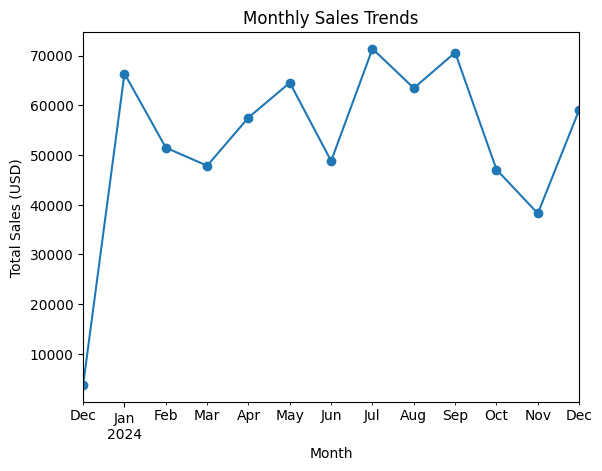

In [25]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

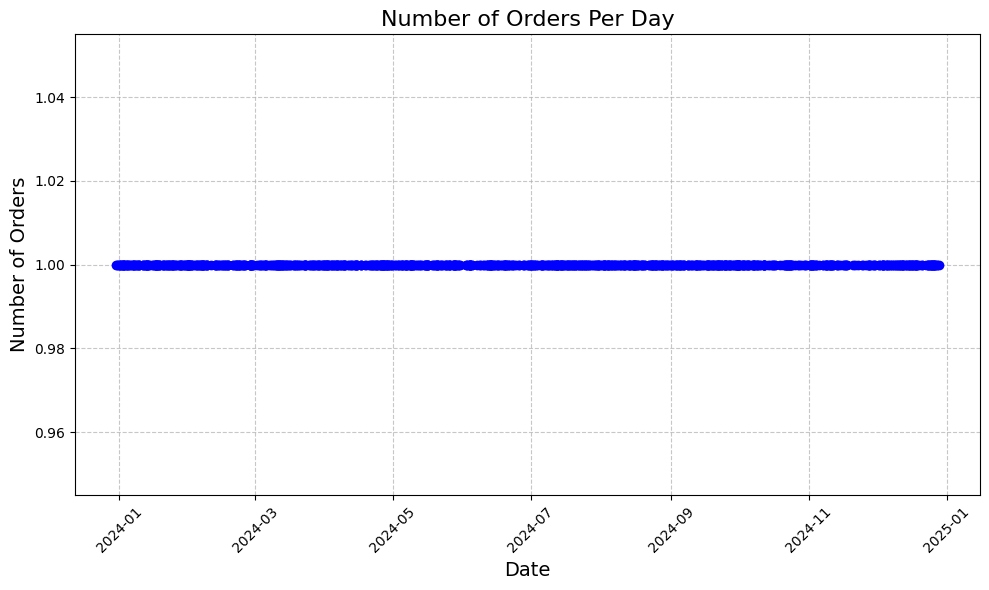

In [30]:
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])

# Group by date and count the number of orders per day
daily_orders = df_transactions.groupby('TransactionDate')['TransactionID'].count()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(daily_orders.index, daily_orders.values, marker='o', color='b')
plt.title('Number of Orders Per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()